C:\Users\pc\AppData\Local\Temp\ipykernel_10188\2524732278.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


<Axes: xlabel='count', ylabel='PURPOSE'>

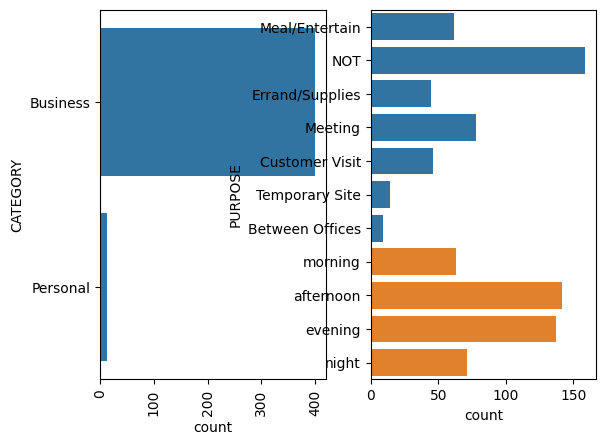

In [26]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('UberDataset.csv')
# dataset.shape
# dataset.info()
dataset['PURPOSE'].fillna("NOT", inplace=True)
# dataset.head()
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')
# dataset.info()
from datetime import datetime
dataset['date']  = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
# dataset.head()
dataset['day-night'] = pd.cut(x=dataset['time'], bins=[0,10,15,19,24], labels=['morning','afternoon','evening','night'])
# dataset.head()
dataset.dropna(inplace=True)
# dataset.head()
# dataset.shape
# DARA VISULIZATION
plt.Figure(figsize=(20,5))
# FOR WGHICH CATEGORY BOOKED UBER
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)
plt.savefig('most_used_by.png')
# FOR WHICH PURPOSE BOOKED UBER
plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.savefig('for-purpose.png')
# plt.subplot(1,2,3)
sns.countplot(dataset['day-night'])


<Axes: xlabel='count', ylabel='day-night'>

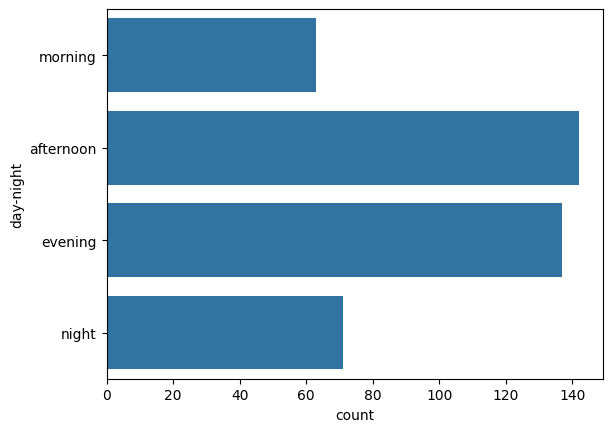

In [27]:
sns.countplot(dataset['day-night'])


In [35]:
# dataset['Month'] = pd.DatetimeIndex(['START_DATE']).month
dataset['Month'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0:'jan',2.0:'fab',3.0:'mar',4.0:'apr',5.0:'may',6.0:'jun',7.0:'jul',8.0:'aug',9.0:'sep',10.0:'oct',11.0:'nov',12.0:'dec'}
dataset['Month'] = dataset.Month.map(month_label)
mon = dataset.Month.value_counts(sort=False)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,morning,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon,jan


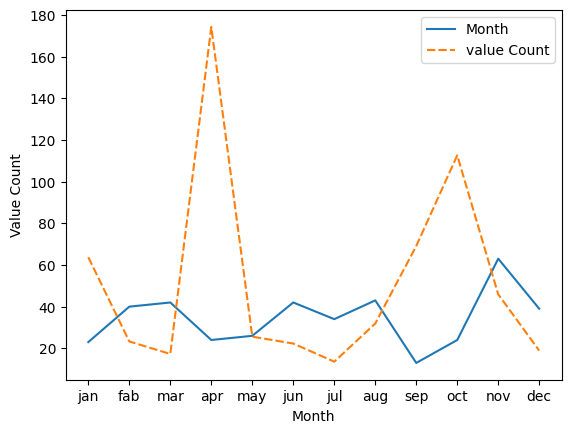

In [38]:
df = pd.DataFrame({
    'Month':mon.values,
    'value Count':dataset.groupby('Month',sort=False)['MILES'].max()
})
p = sns.lineplot(data=df)
p.set(xlabel='Month',ylabel='Value Count')
plt.savefig('most_booked_month.png')



In [40]:
dataset['day'] = dataset.START_DATE.dt.weekday
day_label = ({

    0:'mon', 1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'
})
dataset['day'] = dataset['day'].map(day_label)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night,jan,fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,morning,jan,sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night,jan,sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening,jan,tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon,jan,wed


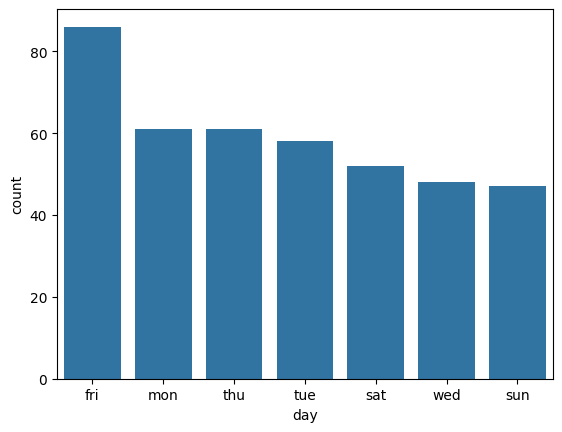

In [42]:
day_label = dataset.day.value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('day')
plt.ylabel('count')
plt.savefig('most_booked-day.png')


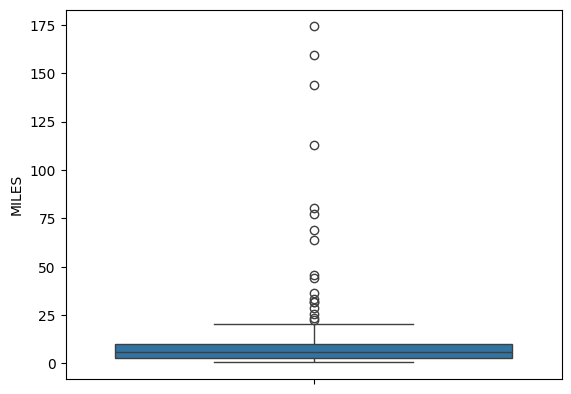

In [46]:
dataset.head()
sns.boxplot(dataset['MILES'])
plt.savefig('total_miles.png')

<Axes: ylabel='MILES'>

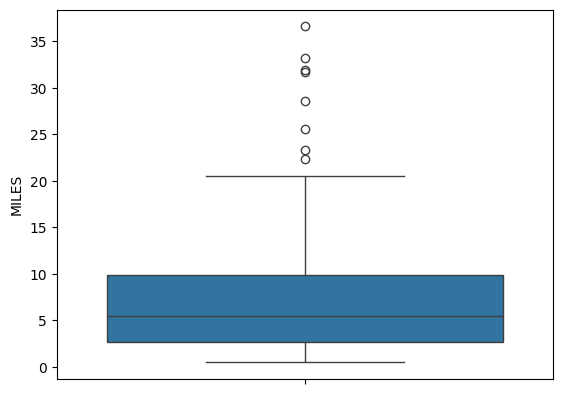

In [49]:
# sns.boxplot(dataset[dataset['MILES']<100]['MILES'])
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

C:\Users\pc\AppData\Local\Temp\ipykernel_10188\3626926160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<100]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

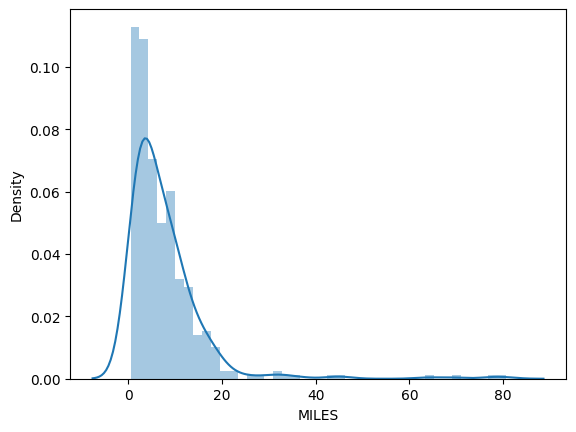

In [50]:
sns.distplot(dataset[dataset['MILES']<100]['MILES'])